# **ANALISIS SENTIMEN BERBASIS ASPEK PADA ULASAN APLIKASI STOCKBIT MENGGUNAKAN ALGORITMA RANDOM FOREST DAN LDA**

## **KELOMPOK 1**

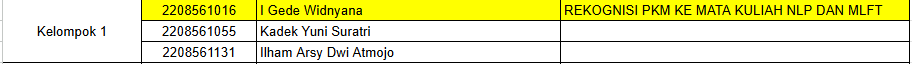


## **Sumber data**

- kaggle : https://www.kaggle.com/datasets/andrimartin/ulasan-aplikasi

## ALUR TAHAP AWAL (ANALISIS DAN TEXT PREPROCESSING)
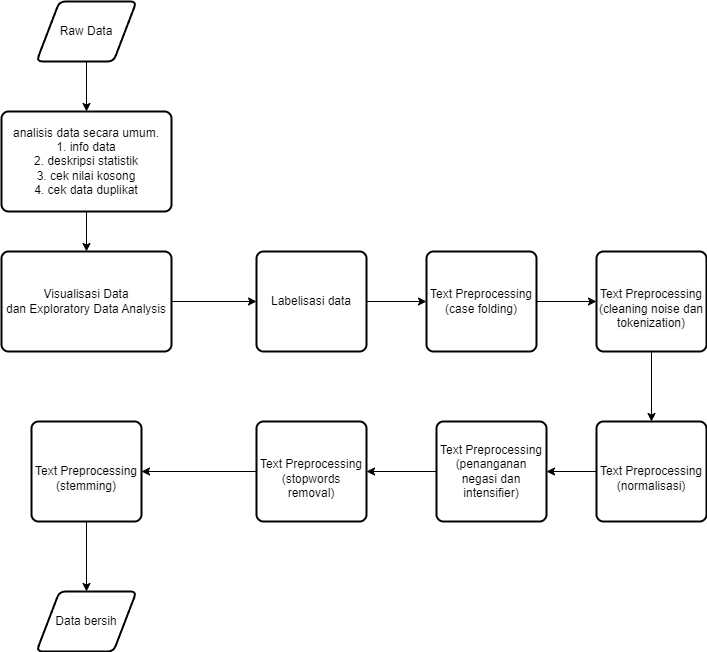

# Import Data

In [1]:
import pandas as pd

data = pd.read_excel('https://docs.google.com/spreadsheets/d/1GrLuZR6hdX02UGXoGedzqCkbdy7AOCgU/export?format=xlsx')

data.sample(5)

,reviewId,userName,o,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
8000,2481e49d-d0ea-46f8-a004-493856e4358d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Wow bgt gt,5,0,2.2.3,2022-02-18 13:15:04,"Halo MuH I Syukron, Kami senang Kamu menyukai ...",2022-02-23 17:51:37,2.2.3
11447,b280d0c5-0407-4378-b92f-5fea6d486df3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Bagus,user friendly",5,0,1.7.52,2019-11-21 07:30:01,NaN,NaN,1.7.52
11457,2f5ba2dc-5c17-4de1-af83-80a8eac19815,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Knp tidak bsa add stock yaa? Mhon d bantu min,3,0,1.7.51,2019-11-08 10:00:56,"Halo Kresna Dwipayana, silahkan update ke vers...",2019-11-19 17:37:54,1.7.51
9403,b036d6f6-8725-4eb6-ab32-6223af4cad39,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ok,5,0,2.3.40,2023-05-11 09:06:14,"Halo Manik2. Hasian,\n\nTerima kasih untuk rev...",2023-05-11 09:12:54,2.3.40
5402,69370156-a845-4d69-854c-5503f7d36f2d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Kenapa withdraw hanya bisa lewat bca ? Gx bisa...,4,1,2.14.0,2024-01-24 15:46:38,"Halo kak Roten,\n\nUntuk penarikan dana hanya ...",2024-01-24 15:58:03,2.14.0


# Analisis Info Dataset secara Umum

In [2]:
# ===============================================
# 🧾 Info Umum Dataset
# ===============================================
print("\n📋 Info Data:")
print(data.info())


📋 Info Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13020 entries, 0 to 13019
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              13020 non-null  object
 1   userName              13020 non-null  object
 2   o                     13020 non-null  object
 3   content               13020 non-null  object
 4   score                 13020 non-null  int64 
 5   thumbsUpCount         13020 non-null  int64 
 6   reviewCreatedVersion  11057 non-null  object
 7   at                    13020 non-null  object
 8   replyContent          10199 non-null  object
 9   repliedAt             10199 non-null  object
 10  appVersion            11057 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.1+ MB
None


In [3]:
print("\n📈 Deskripsi Statistik:")
print(data.describe(include='all'))




📈 Deskripsi Statistik:
                                    reviewId         userName  \
count                                  13020            13020   
unique                                 13020                1   
top     186460dc-afda-4c7e-b41a-0ddfba322153  Pengguna Google   
freq                                       1            13020   
mean                                     NaN              NaN   
std                                      NaN              NaN   
min                                      NaN              NaN   
25%                                      NaN              NaN   
50%                                      NaN              NaN   
75%                                      NaN              NaN   
max                                      NaN              NaN   

                                                        o content  \
count                                               13020   13020   
unique                                                  1

In [4]:
print("\n🔍 Cek Nilai Kosong:")
print(data.isnull().sum())


🔍 Cek Nilai Kosong:
reviewId                   0
userName                   0
o                          0
content                    0
score                      0
thumbsUpCount              0
reviewCreatedVersion    1963
at                         0
replyContent            2821
repliedAt               2821
appVersion              1963
dtype: int64


In [5]:
print("\n🔍 Cek Data Ganda:")
print(data.duplicated().sum())


🔍 Cek Data Ganda:
0


# EDA dan Visualisasi Data (Sebelum Text Preprocessing)


C:\Users\ilham\AppData\Local\Temp\ipykernel_19368\3909203571.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='score', data=data, palette='viridis')


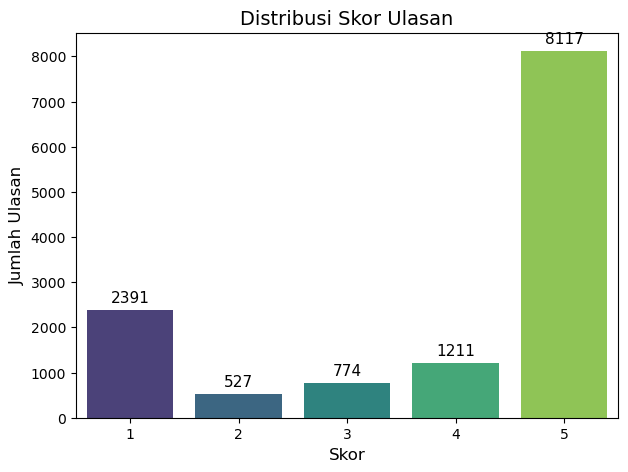

In [6]:
# ===============================================
# 📊 Distribusi Skor + Jumlah di Atas Batang
# ===============================================
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
ax = sns.countplot(x='score', data=data, palette='viridis')

# Tambahkan angka di atas setiap batang
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=11, padding=3, color='black')

plt.title('Distribusi Skor Ulasan', fontsize=14)
plt.xlabel('Skor', fontsize=12)
plt.ylabel('Jumlah Ulasan', fontsize=12)
plt.show()

C:\Users\ilham\AppData\Local\Temp\ipykernel_19368\1915521510.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_bulan['at'].astype(str), y='jumlah_ulasan', data=top10_bulan, palette='viridis')


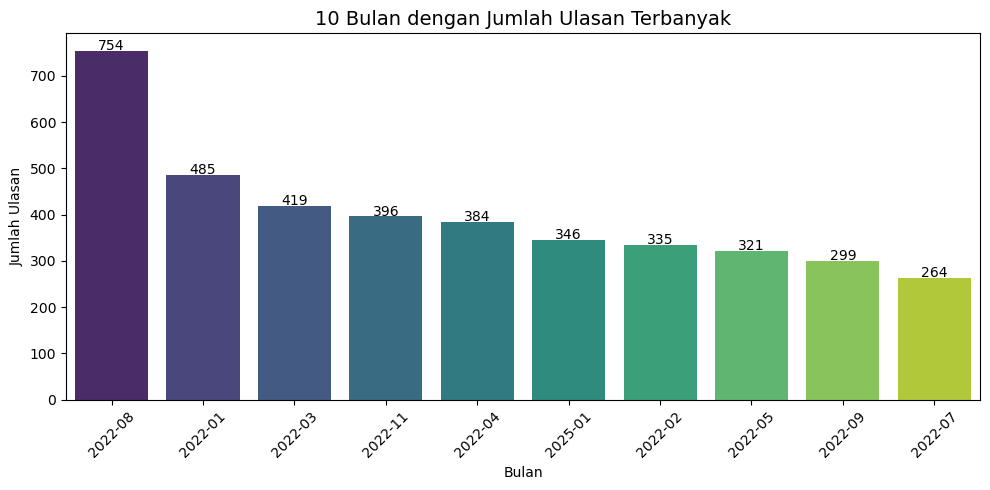

In [7]:
# ============================================================
# 🕓 DISTRIBUSI WAKTU PENULISAN ULASAN (TOP 10 BULAN TERBANYAK)
# ============================================================
data['at'] = pd.to_datetime(data['at'], errors='coerce')

# Hitung jumlah ulasan per bulan
ulasan_per_bulan = data.groupby(data['at'].dt.to_period('M')).size().reset_index(name='jumlah_ulasan')

# Urutkan dari yang terbanyak dan ambil 10 teratas
top10_bulan = ulasan_per_bulan.sort_values('jumlah_ulasan', ascending=False).head(10)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=top10_bulan['at'].astype(str), y='jumlah_ulasan', data=top10_bulan, palette='viridis')

# Tambahkan angka di atas batang
for i, val in enumerate(top10_bulan['jumlah_ulasan']):
    plt.text(i, val + 2, str(val), ha='center', fontsize=10, color='black')

plt.title('10 Bulan dengan Jumlah Ulasan Terbanyak', fontsize=14)
plt.xlabel('Bulan')
plt.ylabel('Jumlah Ulasan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\ilham\AppData\Local\Temp\ipykernel_19368\3541339844.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='appVersion', y='score', data=avg_version, palette='mako')


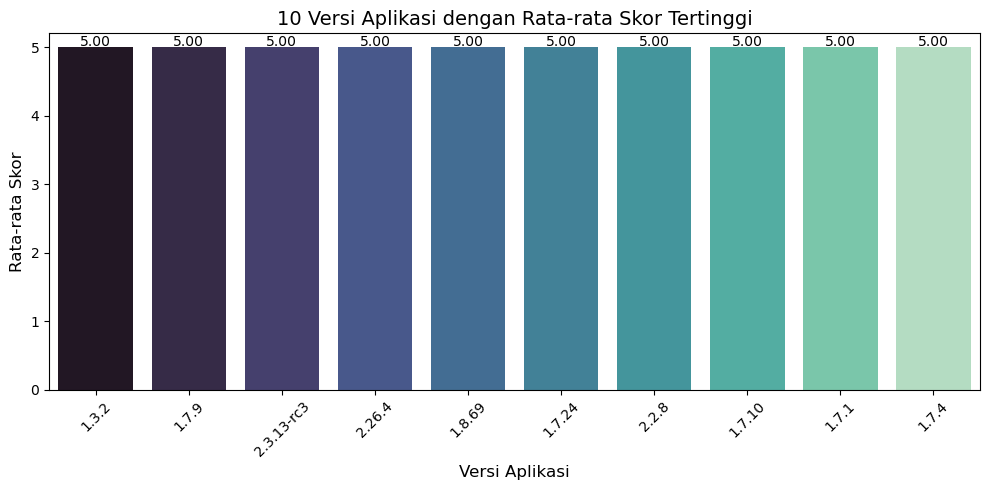

In [8]:
# ============================================================
# 🧩 RATA-RATA SKOR PER VERSI APLIKASI (TOP 10)
# ============================================================
plt.figure(figsize=(10,5))

# Hitung rata-rata skor per versi, lalu ambil 10 versi dengan skor tertinggi
avg_version = (
    data.groupby('appVersion')['score']
    .mean()
    .reset_index()
    .sort_values('score', ascending=False)
    .head(10)
)

# Plot bar chart
ax = sns.barplot(x='appVersion', y='score', data=avg_version, palette='mako')

# Tambahkan label di atas batang
for i, val in enumerate(avg_version['score']):
    plt.text(i, val + 0.02, f"{val:.2f}", ha='center', fontsize=10, color='black')

plt.title('10 Versi Aplikasi dengan Rata-rata Skor Tertinggi', fontsize=14)
plt.xlabel('Versi Aplikasi', fontsize=12)
plt.ylabel('Rata-rata Skor', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, 5.2)
plt.tight_layout()
plt.show()

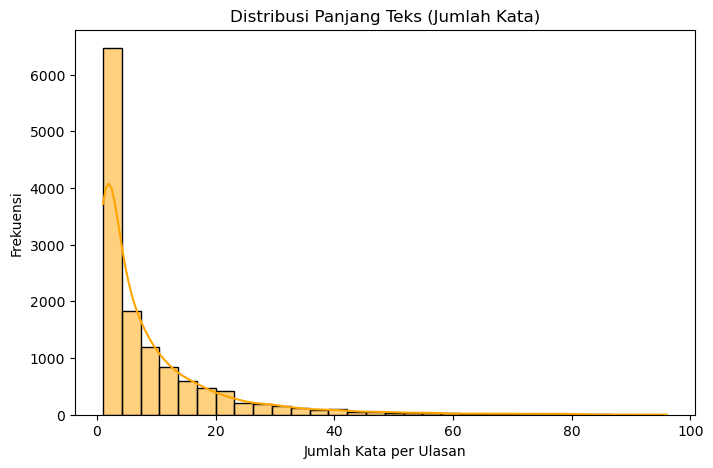

In [9]:
# ============================================================
# ✍️ PANJANG TEKS (MENTAH, SEBELUM CLEANING)
# ============================================================
data['text_length_raw'] = data['content'].astype(str).apply(lambda x: len(x.split()))

plt.figure(figsize=(8,5))
sns.histplot(data['text_length_raw'], bins=30, kde=True, color='orange')
plt.title('Distribusi Panjang Teks (Jumlah Kata)')
plt.xlabel('Jumlah Kata per Ulasan')
plt.ylabel('Frekuensi')
plt.show()

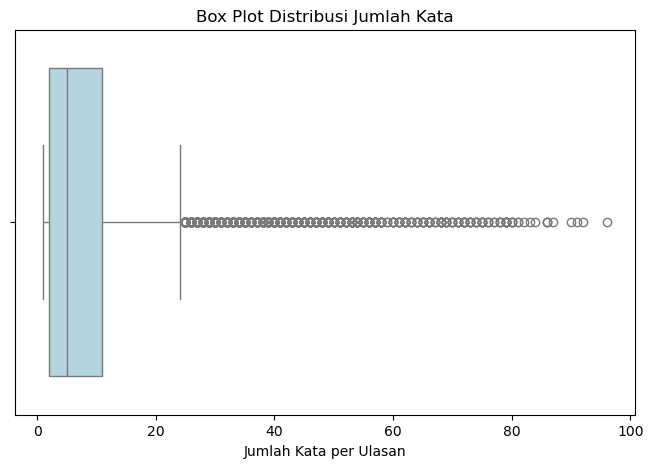

In [10]:
# ============================================================
# 📦 BOX PLOT JUMLAH KATA
# ============================================================
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['text_length_raw'], color='lightblue')
plt.title('Box Plot Distribusi Jumlah Kata')
plt.xlabel('Jumlah Kata per Ulasan')
plt.show()

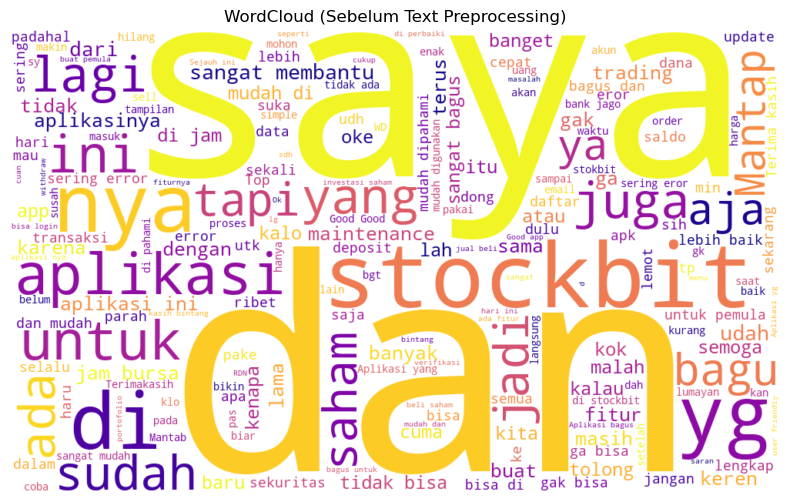

In [11]:
# ============================================================
# ☁️ WORDCLOUD MENTAH (BELUM BERSIH)
# ============================================================
from wordcloud import WordCloud

all_text = ' '.join(data['content'].astype(str))
wordcloud = WordCloud(width=1000, height=600, background_color='white', colormap='plasma').generate(all_text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud (Sebelum Text Preprocessing)')
plt.show()

C:\Users\ilham\AppData\Local\Temp\ipykernel_19368\4243528224.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Kata', x='Frekuensi', data=common_words, palette='magma')


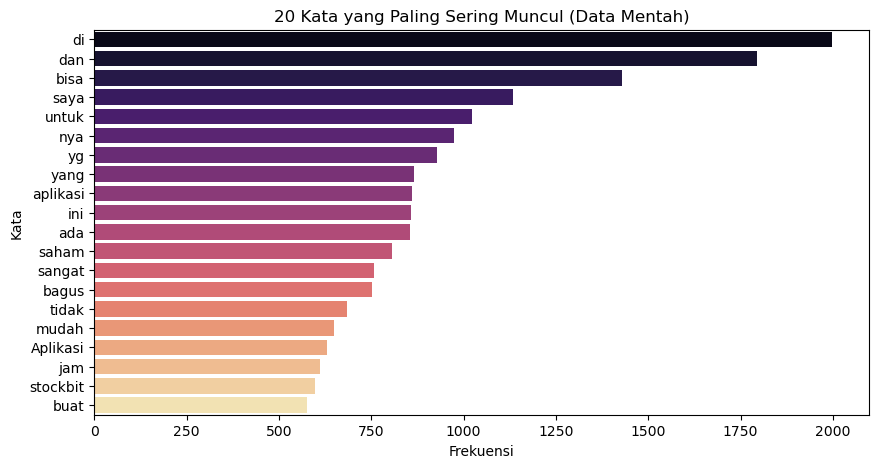

In [12]:
# ============================================================
# 🔠 20 KATA PALING SERING MUNCUL (MENTAH)
# ============================================================
from collections import Counter

words = all_text.split()
word_freq = Counter(words)
common_words = pd.DataFrame(word_freq.most_common(20), columns=['Kata', 'Frekuensi'])

plt.figure(figsize=(10,5))
sns.barplot(y='Kata', x='Frekuensi', data=common_words, palette='magma')
plt.title('20 Kata yang Paling Sering Muncul (Data Mentah)')
plt.show()

In [13]:
# ============================================================
# 📋 RINGKASAN
# ============================================================
print("Jumlah total ulasan:", len(data))
print("Rata-rata panjang ulasan:", round(data['text_length_raw'].mean(), 2), "kata")
print("Rata-rata skor:", round(data['score'].mean(), 2))

Jumlah total ulasan: 13020
Rata-rata panjang ulasan: 8.95 kata
Rata-rata skor: 3.93


# LABELISASI

In [14]:
# Menyisakan hanya kolom content dan score
data_prepro = data[['content', 'score']]

# Cek hasil
data_prepro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13020 entries, 0 to 13019
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  13020 non-null  object
 1   score    13020 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 203.6+ KB


In [15]:
# ============================================================
# 🏷️ LABELISASI SENTIMEN BERDASARKAN SKOR
# ============================================================

# Menyisakan hanya kolom content dan score
data_prepro = data[['content', 'score']].copy()

# Membuat kolom label berdasarkan skor
def label_sentiment(score):
    if score >= 4:
        return 'positive'
    elif score == 3:
        return 'neutral'
    else:
        return 'negative'

data_prepro['label'] = data_prepro['score'].apply(label_sentiment)

# Cek hasil labelisasi
print(data_prepro['label'].value_counts())
data_prepro.head()

label
positive    9328
negative    2918
neutral      774
Name: count, dtype: int64


,content,score,label
0,"hey admin, ku harap update berikutnya aplikasi...",4,positive
1,Gak ada lawan. Pengalaman interface yang luar ...,5,positive
2,Kelebihan : Chat Support cepat dijawab dan dil...,4,positive
3,Charting masih pinjam punya tradingview. Indik...,1,negative
4,Agak males ah klo misal hapus akun terus no sa...,1,negative


C:\Users\ilham\AppData\Local\Temp\ipykernel_19368\2046144023.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='label', data=data_prepro, palette='viridis')


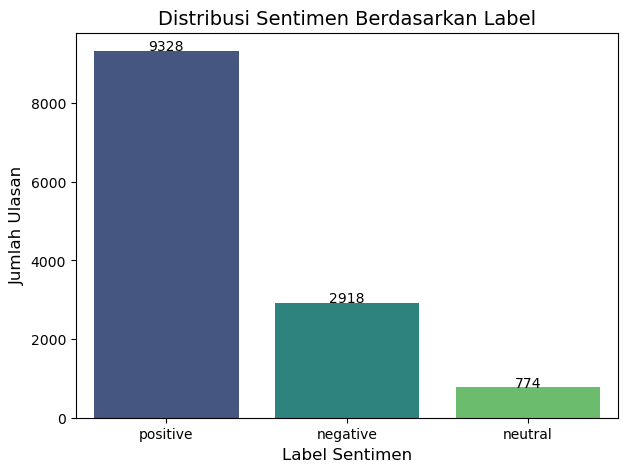

In [16]:
# ============================================================
# 📊 DISTRIBUSI LABEL SENTIMEN
# ============================================================

plt.figure(figsize=(7,5))
ax = sns.countplot(x='label', data=data_prepro, palette='viridis')

# Tambahkan angka di atas batang
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height() + 5,
            int(p.get_height()), ha='center', fontsize=10, color='black')

plt.title('Distribusi Sentimen Berdasarkan Label', fontsize=14)
plt.xlabel('Label Sentimen', fontsize=12)
plt.ylabel('Jumlah Ulasan', fontsize=12)
plt.show()

--- Bigram WordClouds ---


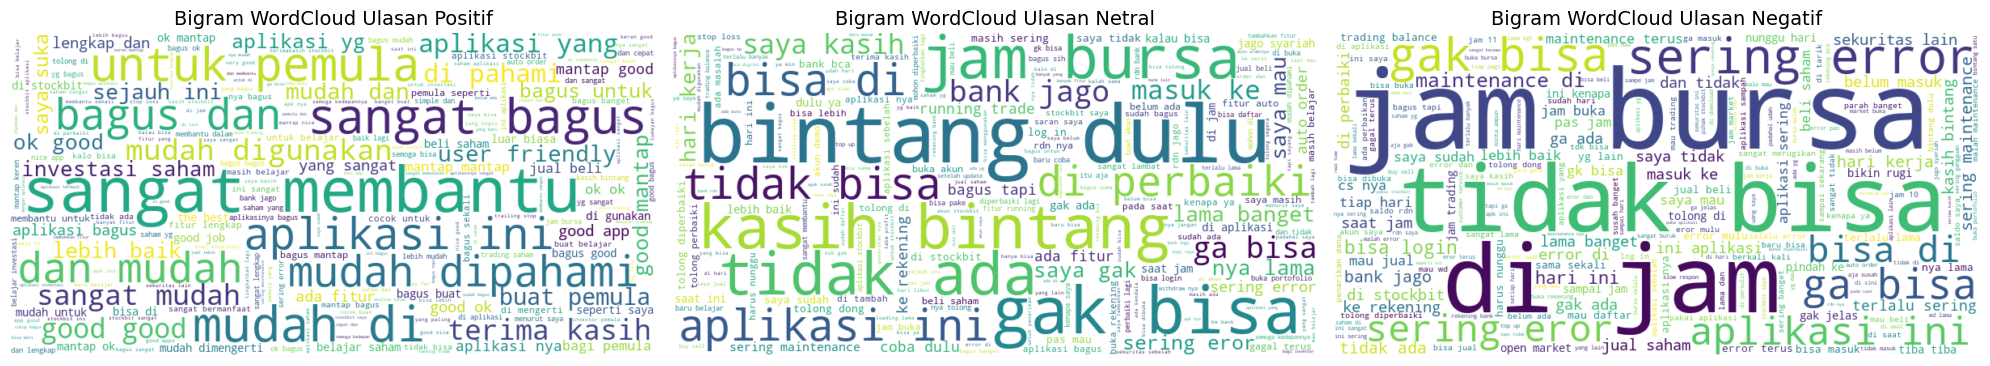


--- Trigram WordClouds ---


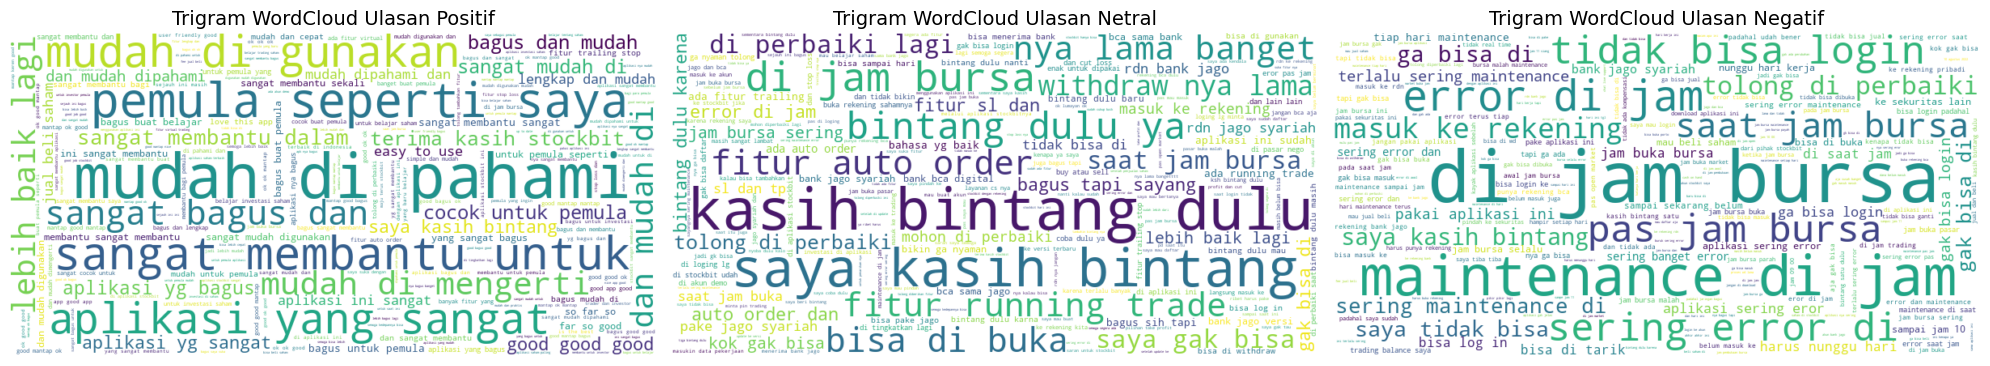

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Fungsi untuk mendapatkan n-gram
def get_ngrams(text, n):
    vectorizer = CountVectorizer(ngram_range=(n, n))
    # Handle empty strings in text
    if not text:
        return {}
    try:
        X = vectorizer.fit_transform([text])
        feature_names = vectorizer.get_feature_names_out()
        frequencies = X.sum(axis=0).A1
        return dict(zip(feature_names, frequencies))
    except ValueError:
        # Handle cases where text is too short for n-grams
        return {}


# Pisahkan data berdasarkan label
data_positif = data_prepro[data_prepro['label'] == "positive"]
data_negatif = data_prepro[data_prepro['label'] == "negative"]
data_netral  = data_prepro[data_prepro['label'] == "neutral"]

# Gabungkan semua teks bersih dari kolom 'Clean_Text' untuk setiap kategori
all_text_positif = ' '.join(data_positif['content'].dropna())
all_text_negatif = ' '.join(data_negatif['content'].dropna())
all_text_netral  = ' '.join(data_netral['content'].dropna())

# --- Bigram WordClouds ---
print("--- Bigram WordClouds ---")
plt.figure(figsize=(20, 8))

# Positif Bigram
bigram_positif = get_ngrams(all_text_positif, 2)
if bigram_positif:
    wordcloud_bigram_positif = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(bigram_positif)
    ax = plt.subplot(1, 3, 1)
    ax.imshow(wordcloud_bigram_positif, interpolation='bilinear')
    ax.set_title('Bigram WordCloud Ulasan Positif', fontsize=14)
    ax.axis('off')

# Netral Bigram
bigram_netral = get_ngrams(all_text_netral, 2)
if bigram_netral:
    wordcloud_bigram_netral = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(bigram_netral)
    ax = plt.subplot(1, 3, 2)
    ax.imshow(wordcloud_bigram_netral, interpolation='bilinear')
    ax.set_title('Bigram WordCloud Ulasan Netral', fontsize=14)
    ax.axis('off')

# Negatif Bigram
bigram_negatif = get_ngrams(all_text_negatif, 2)
if bigram_negatif:
    wordcloud_bigram_negatif = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(bigram_negatif)
    ax = plt.subplot(1, 3, 3)
    ax.imshow(wordcloud_bigram_negatif, interpolation='bilinear')
    ax.set_title('Bigram WordCloud Ulasan Negatif', fontsize=14)
    ax.axis('off')

plt.tight_layout()
plt.show()


# --- Trigram WordClouds ---
print("\n--- Trigram WordClouds ---")
plt.figure(figsize=(20, 8))

# Positif Trigram
trigram_positif = get_ngrams(all_text_positif, 3)
if trigram_positif:
    wordcloud_trigram_positif = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(trigram_positif)
    ax = plt.subplot(1, 3, 1)
    ax.imshow(wordcloud_trigram_positif, interpolation='bilinear')
    ax.set_title('Trigram WordCloud Ulasan Positif', fontsize=14)
    ax.axis('off')

# Netral Trigram
trigram_netral = get_ngrams(all_text_netral, 3)
if trigram_netral:
    wordcloud_trigram_netral = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(trigram_netral)
    ax = plt.subplot(1, 3, 2)
    ax.imshow(wordcloud_trigram_netral, interpolation='bilinear')
    ax.set_title('Trigram WordCloud Ulasan Netral', fontsize=14)
    ax.axis('off')

# Negatif Trigram
trigram_negatif = get_ngrams(all_text_negatif, 3)
if trigram_negatif:
    wordcloud_trigram_negatif = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(trigram_negatif)
    ax = plt.subplot(1, 3, 3)
    ax.imshow(wordcloud_trigram_negatif, interpolation='bilinear')
    ax.set_title('Trigram WordCloud Ulasan Negatif', fontsize=14)
    ax.axis('off')

plt.tight_layout()
plt.show()

# DESAIN USE CASE DIAGRAM

# DESAIN DIAGRAM ACTIVITY

A. Input teks

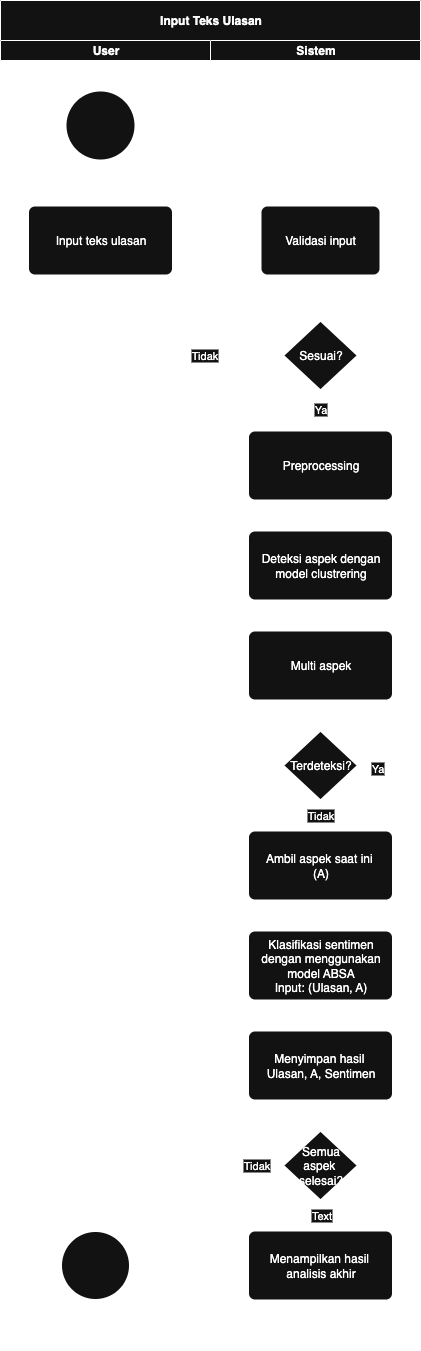

B. Upload file

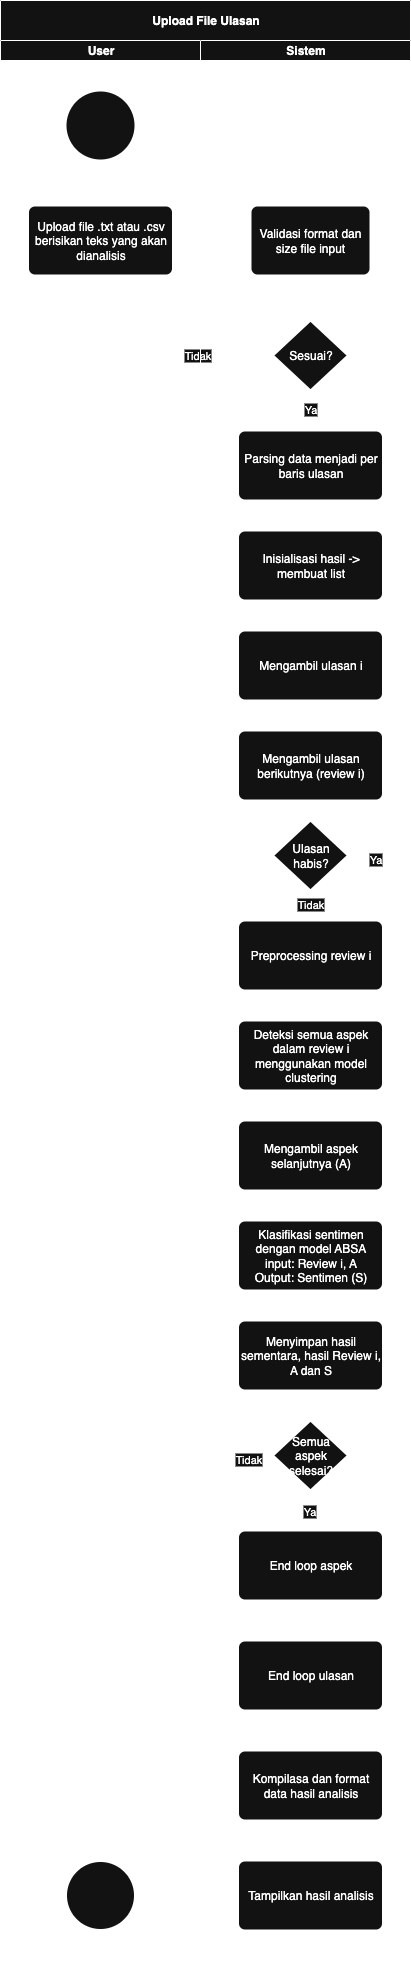

# DESAIN ANTARMUKA
A. Fitur input manual
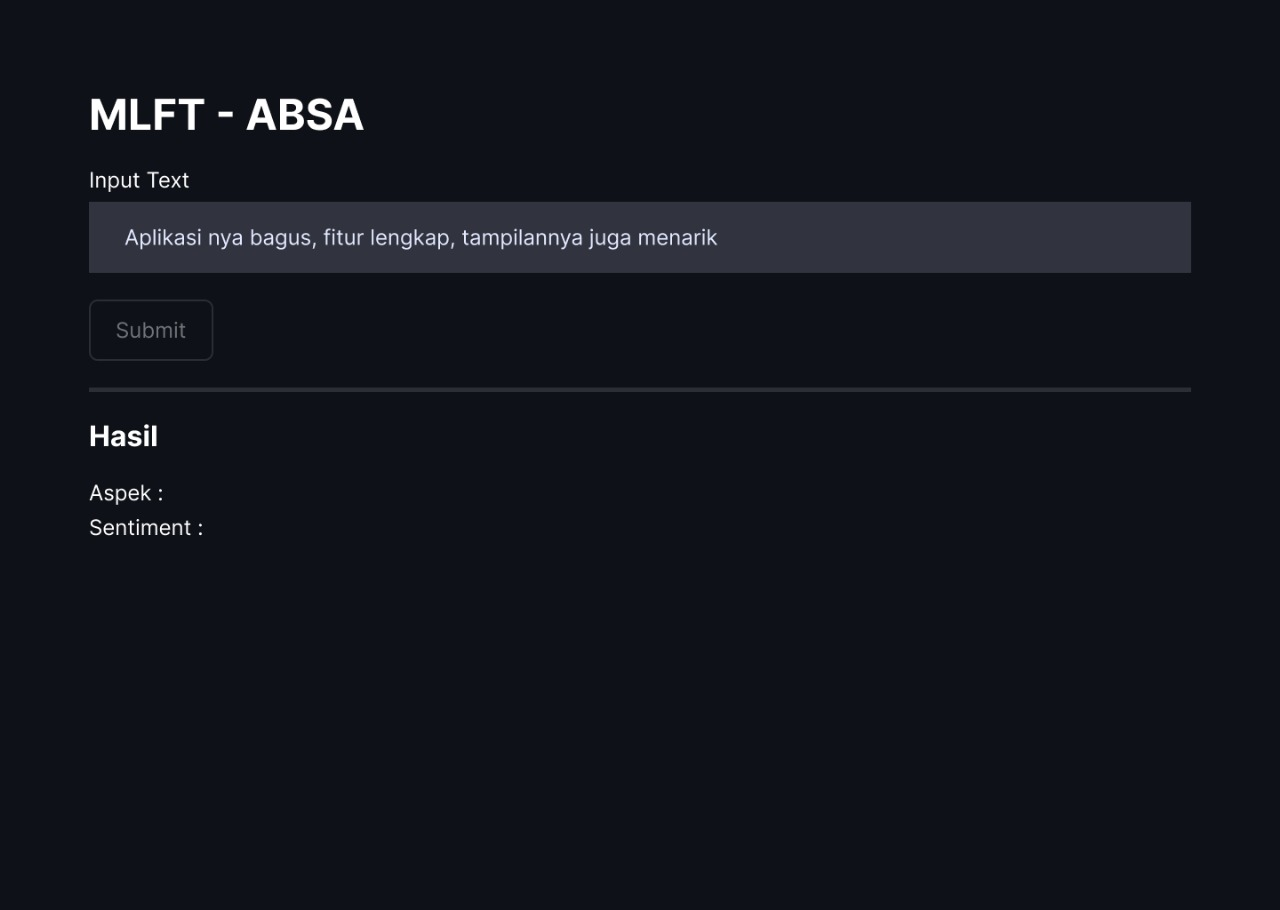

B. Fitur input excel
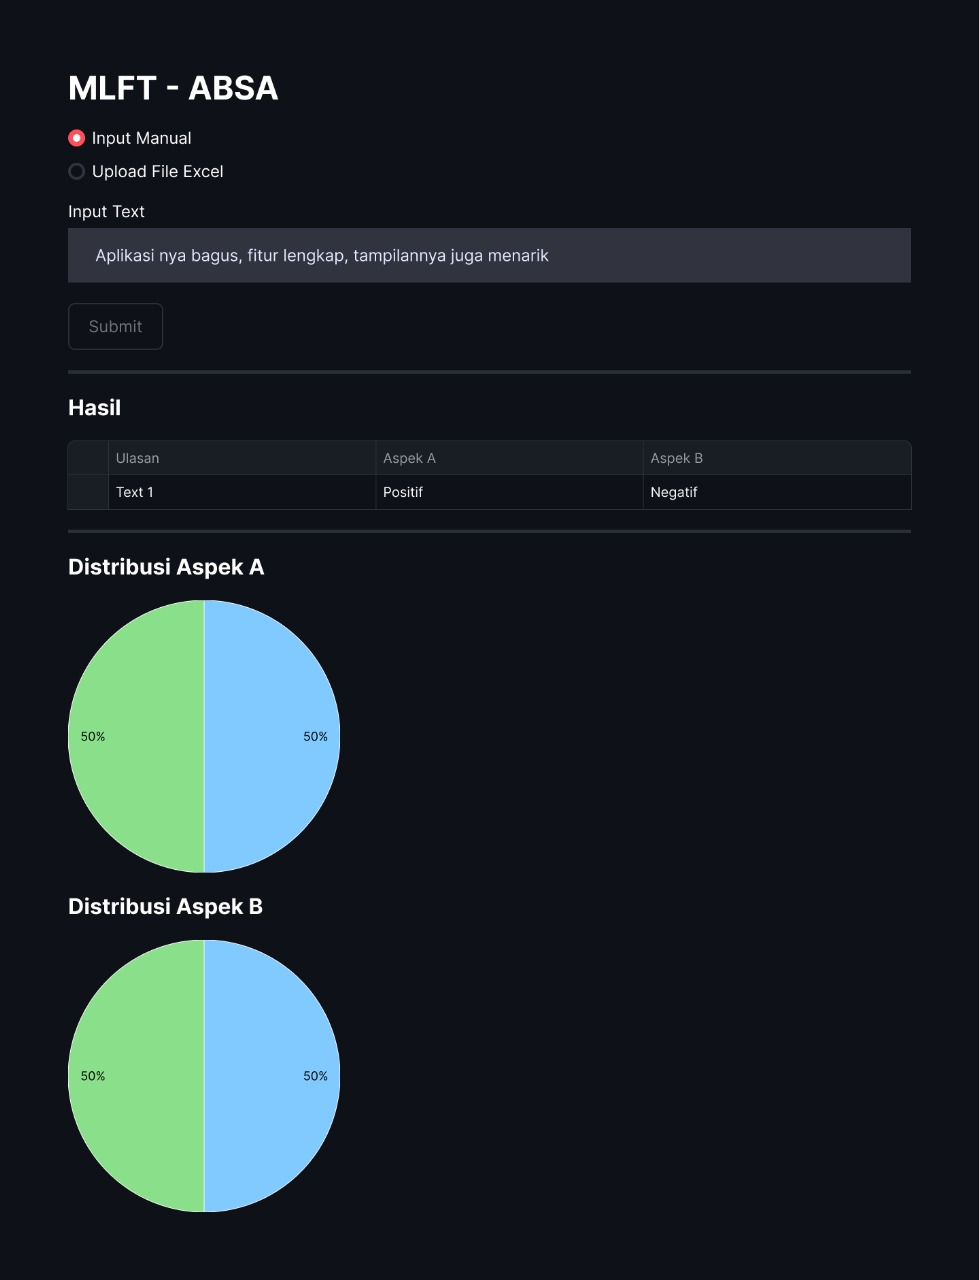



# Text Preprocessing

In [18]:
!pip install Sastrawi

In [19]:
data_prepro["lower_content"] = data_prepro["content"].str.lower()
print("Case Folding :\n")
data_prepro

Case Folding :



,content,score,label,lower_content
0,"hey admin, ku harap update berikutnya aplikasi...",4,positive,"hey admin, ku harap update berikutnya aplikasi..."
1,Gak ada lawan. Pengalaman interface yang luar ...,5,positive,gak ada lawan. pengalaman interface yang luar ...
2,Kelebihan : Chat Support cepat dijawab dan dil...,4,positive,kelebihan : chat support cepat dijawab dan dil...
3,Charting masih pinjam punya tradingview. Indik...,1,negative,charting masih pinjam punya tradingview. indik...
4,Agak males ah klo misal hapus akun terus no sa...,1,negative,agak males ah klo misal hapus akun terus no sa...
...,...,...,...,...
13015,Mantul..........,5,positive,mantul..........
13016,keren...,5,positive,keren...
13017,Great...,5,positive,great...
13018,Mantap.....,5,positive,mantap.....


In [20]:
import string
import re
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# ============================================================
# 🧹 CLEANING TEXT STEP BY STEP
# ============================================================

def remove_Contents_special(text):
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    text = text.encode('ascii', 'replace').decode('ascii')
    text = ' '.join(re.sub(r"([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)", " ", text).split())
    return text.replace("http://", " ").replace("https://", " ")


def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

def remove_whitespace_LT(text):
    return text.strip()

def remove_whitespace_multiple(text):
    return re.sub(r'\s+',' ',text)

def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

def remove_repeated_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

def remove_number(text):
    return re.sub(r"[0-9]+", " ", text)


data_prepro['clean_content'] = data_prepro['lower_content'].apply(remove_Contents_special)
data_prepro['clean_content'] = data_prepro['clean_content'].apply(remove_punctuation)
data_prepro['clean_content'] = data_prepro['clean_content'].apply(remove_whitespace_LT)
data_prepro['clean_content'] = data_prepro['clean_content'].apply(remove_whitespace_multiple)
data_prepro['clean_content'] = data_prepro['clean_content'].apply(remove_repeated_char) 
data_prepro['clean_content'] = data_prepro['clean_content'].apply(remove_number)
data_prepro['clean_content'] = data_prepro['clean_content'].apply(remove_singl_char)

# ============================================================
# ✂️ TOKENIZATION
# ============================================================

def word_tokenize_wrapper(text):
    return word_tokenize(text)

data_prepro['Tokenization'] = data_prepro['clean_content'].apply(word_tokenize_wrapper)

print('✅ Hasil Tokenizing dan Cleaning:\n')
data_prepro


✅ Hasil Tokenizing dan Cleaning:



,content,score,label,lower_content,clean_content,Tokenization
0,"hey admin, ku harap update berikutnya aplikasi...",4,positive,"hey admin, ku harap update berikutnya aplikasi...",hey admin ku harap update berikutnya aplikasi ...,"[hey, admin, ku, harap, update, berikutnya, ap..."
1,Gak ada lawan. Pengalaman interface yang luar ...,5,positive,gak ada lawan. pengalaman interface yang luar ...,gak ada lawan pengalaman interface yang luar b...,"[gak, ada, lawan, pengalaman, interface, yang,..."
2,Kelebihan : Chat Support cepat dijawab dan dil...,4,positive,kelebihan : chat support cepat dijawab dan dil...,kelebihan chat suport cepat dijawab dan dilaya...,"[kelebihan, chat, suport, cepat, dijawab, dan,..."
3,Charting masih pinjam punya tradingview. Indik...,1,negative,charting masih pinjam punya tradingview. indik...,charting masih pinjam punya tradingview indika...,"[charting, masih, pinjam, punya, tradingview, ..."
4,Agak males ah klo misal hapus akun terus no sa...,1,negative,agak males ah klo misal hapus akun terus no sa...,agak males ah klo misal hapus akun terus no sa...,"[agak, males, ah, klo, misal, hapus, akun, ter..."
...,...,...,...,...,...,...
13015,Mantul..........,5,positive,mantul..........,mantul,[mantul]
13016,keren...,5,positive,keren...,keren,[keren]
13017,Great...,5,positive,great...,great,[great]
13018,Mantap.....,5,positive,mantap.....,mantap,[mantap]


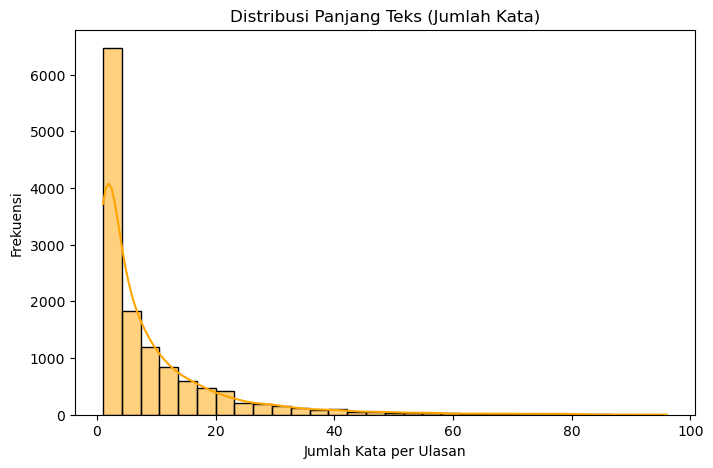

In [21]:
# ============================================================
# ✍️ PANJANG TEKS (SESUDAH CLEANING)
# ============================================================
data_prepro['text_length_raw'] = data_prepro['clean_content'].astype(str).apply(lambda x: len(x.split()))

plt.figure(figsize=(8,5))
sns.histplot(data['text_length_raw'], bins=30, kde=True, color='orange')
plt.title('Distribusi Panjang Teks (Jumlah Kata)')
plt.xlabel('Jumlah Kata per Ulasan')
plt.ylabel('Frekuensi')
plt.show()

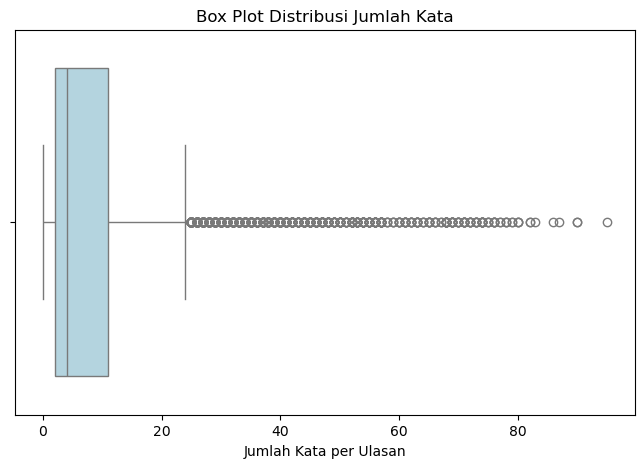

In [22]:
# ============================================================
# 📦 BOX PLOT JUMLAH KATA
# ============================================================
plt.figure(figsize=(8, 5))
sns.boxplot(x=data_prepro['text_length_raw'], color='lightblue')
plt.title('Box Plot Distribusi Jumlah Kata')
plt.xlabel('Jumlah Kata per Ulasan')
plt.show()

In [23]:
data_prepro[data_prepro['clean_content'].str.split().str.len() == 1]['clean_content'].head(50)

3039                     mengecewakan
4464                      pertahankan
7152                      persyaratan
7426                 mantabcuansukses
7470    symengertidancukupmemahaminya
7713                     menyenangkan
7818                     menyenangkan
7855                      pertahankan
7902                     menyenangkan
7919                        lanjutkan
8060                      menyebalkan
8064                     mantapsimpel
8082                       memudahkan
8125                            boleh
8126                            bagus
8135                              god
8137                               ok
8141                           nyaman
8142                           mantap
8143                           mantab
8144                           mantap
8147                              sip
8148                            keren
8149                           lancar
8151                           mantap
8154                           mantav
8155        

In [24]:
data_prepro[data_prepro['clean_content'].str.split().str.len() == 2]['clean_content'].head(50)

825            makin lengkapmantap
913              pendaftaran susah
918                menunya lengkap
957        cepatamandan terpercaya
1025    mantapmudah mengoperasikan
1028             sangat bagusjuara
1334              sangat memuaskan
1355               mudah digunakan
1388              sangat memuaskan
1436               sangat membantu
1449               cukup memuaskan
1480             sangat memudahkan
2382              memuaskan mantap
2389           nyaman berinvestasi
2426                 banyak alasan
2509         sederhanakan fiturnya
2551              mudah dimengerti
2841               sangat membantu
2860               mudah digunakan
3207               akhirnya nemuin
3274                  bagus sekali
3276                  bagus sekali
4293                  bagus sekali
4641                   terbaik lah
4642              mudah menentukan
4643                mantapz sekali
4691              lengkap fiturnya
4906              mudah dipakainya
4932              fi

In [25]:
data_prepro = data_prepro.drop_duplicates(subset='clean_content')

In [26]:
kondisi = data_prepro['clean_content'].str.split().str.len() > 1

data_prepro = data_prepro[kondisi]

In [27]:
kondisi = data_prepro['clean_content'].str.split().str.len() < 80
data_prepro = data_prepro[kondisi]

C:\Users\ilham\AppData\Local\Temp\ipykernel_19368\2046144023.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='label', data=data_prepro, palette='viridis')


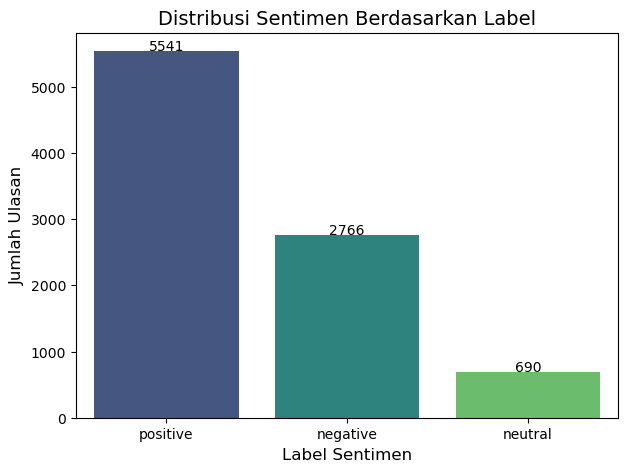

In [28]:
# ============================================================
# 📊 DISTRIBUSI LABEL SENTIMEN
# ============================================================

plt.figure(figsize=(7,5))
ax = sns.countplot(x='label', data=data_prepro, palette='viridis')

# Tambahkan angka di atas batang
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height() + 5,
            int(p.get_height()), ha='center', fontsize=10, color='black')

plt.title('Distribusi Sentimen Berdasarkan Label', fontsize=14)
plt.xlabel('Label Sentimen', fontsize=12)
plt.ylabel('Jumlah Ulasan', fontsize=12)
plt.show()

In [29]:
# URL file normalisasi dari GitHub
url_normalisasi = "https://github.com/GdWidnyana/C1_UTS-PPDM-Text/raw/main/normalisasi.xlsx"

# Membaca file normalisasi langsung dari GitHub
normalizad_word = pd.read_excel(url_normalisasi)

# Membuat dictionary untuk normalisasi kata
normalizad_word_dict = {}
for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1]

normalizad_word_dict.update({
    "app": "aplikasi",
    "apk": "aplikasi",
    "wa": "whatsapp",
    "ig": "instagram",
    "fb": "facebook",
    "hp": "handphone",
    "kl": "kalau",
    "ni": "ini",
    "ok": "oke",
    "da": "sudah",
    "ng": "tidak",
    "ut": "untuk",
    "br": "baru",
    "ye": "iya",
    "bu": "butuh uang",
    "sd": "sudah",
    "cs": "customer service",
    "kl": "kalau",
    "ux": "user experience",
    "ui": "user interface",
    "dr": "dari",
    "pd": "pada",
    "jt": "juta",
    "gb": "gigabyte",
    "pw": "password",
    "tf": "transfer",
    "kg": "tidak",
    "rl": "kehidupan",
    "dm": "pesan",
    "ko": "kenapa",
    "id": "indonesia",
    "va": "virtual account",
    "ps": "saat",
    "vc": "panggilan",
    "stocbit": "stockbit",
    "sa": "saya",
    "gakbisa": "tidak bisa",
    "wd": "withdrawal",
    "on": "ke",
    "ap": "apa",
    "gd": "tidak ada",
    "sb": "stockbit",
    "it": "itu",
    "pt": "perusahaan",
    "mt": "maintenance",
    "bntng": "bintang",
    "fc": "keluar",
    "nd": "tidak",
    "nh": "nah",
    "mu": "kamu",
    "didlm": "dalam",
    "lm": "lama",
    "th": "tahun",
    "ra": "tidak",
    "jm": "jam",
    "withdrawl": "withdrawal",
    "bg": "bagi",
    "tld": "tolong",
    "koq": "kenapa",
    "kog": "kenapa",
    "sda": "sudah",
    "sni": "sini",
    "ush": "usah",
    "bgt": "banget",
    "cma": "cuma",
    "bnyk": "banyak",
    "lha": "bahkan",
    "oks": "oke",
    "rekomen": "rekomendasi",
    "komen": "komentar",
    "koment": "komentar",
    "okay": "oke"
})

# Fungsi normalisasi kata
def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

# Menerapkan normalisasi ke data_prepro
data_prepro['Normalization'] = data_prepro['Tokenization'].apply(normalized_term)

# Menampilkan hasil
data_prepro[['content', 'score', 'label', 'Tokenization', 'Normalization']].head()

C:\Users\ilham\AppData\Local\Temp\ipykernel_19368\2526448915.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[0] not in normalizad_word_dict:
C:\Users\ilham\AppData\Local\Temp\ipykernel_19368\2526448915.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  normalizad_word_dict[row[0]] = row[1]


,content,score,label,Tokenization,Normalization
0,"hey admin, ku harap update berikutnya aplikasi...",4,positive,"[hey, admin, ku, harap, update, berikutnya, ap...","[hey, admin, saya, harap, update, berikutnya, ..."
1,Gak ada lawan. Pengalaman interface yang luar ...,5,positive,"[gak, ada, lawan, pengalaman, interface, yang,...","[tidak, ada, lawan, pengalaman, interface, yan..."
2,Kelebihan : Chat Support cepat dijawab dan dil...,4,positive,"[kelebihan, chat, suport, cepat, dijawab, dan,...","[kelebihan, chat, suport, cepat, dijawab, dan,..."
3,Charting masih pinjam punya tradingview. Indik...,1,negative,"[charting, masih, pinjam, punya, tradingview, ...","[charting, masih, pinjam, punya, tradingview, ..."
5,oke banget. fitur2nya saya suka. hanya untuk t...,5,positive,"[oke, banget, fitur, nya, saya, suka, hanya, u...","[oke, banget, fitur, nya, saya, suka, hanya, u..."


In [30]:
import requests
url_stopwords_raw = "https://raw.githubusercontent.com/stopwords-iso/stopwords-id/master/stopwords-id.txt"
response = requests.get(url_stopwords_raw)
stopwords_list = response.text.split('\n')

# Mengubah list menjadi set untuk pencarian yang lebih cepat
stopwords_set = set(stopwords_list)

all_new_stopwords = [
    "nya", "ya", "mi", "as", "oy", "gp", "yp", "bq", "cp", "od", "tg", "oh", 
    "ac", "eh", "sl", "cl", "rt", "rd", "dj", "sr", "mk", "hu", "ce", "rb", 
    "nb", "ta", "ik", "hv", "ot", "ks", "lc", "oe", "ts", "me", "ab", "gl", 
    "sc", "pl", "ci", "du", "bc", "hi", "ri", "vs", "dc", "oc", "cd", "om", 
    "do", "li", "ol", "rv", "xf", "vq", "ae", "df", "bo", "ho", "xn", "ug", 
    "fa", "oi", "nc", "vp", "sf", "ge", "na", "uh", "pe", "te", "hm", "st", 
    "ha", "we",
    
    'fe', 'of', 'up', 'is', 'us', 'by', 'or', 'al', 'pa', 'xl', 'lk', 'ah', 
    'an', 'pc', 'in', 'if', 'kr', 'tb', 'hk', 'ne', 'sh', 'tk', 'dk', 'pr', 
    'hp', 'he', 'gr', 'am', 'os', 'bt', 'be', 'ct', 'im', 'hq', 'bi', 'le', 
    'mg', 'ep', 'cz', 'sk', 'ai', 'su', 'nu', 'gu', 'ez', 'go', 'ba', 'eq', 
    'lh', 'qw', 'ew', 'qa', 'xc', 'my', 'at',

    'anj','bde','pcs','lao','air','beb','gos','lur','oce','coy','bag','lkh',
    'hel','aih','bah','les','pit','ben','lkp','hey'
]

# Jalankan satu perintah ini untuk menambahkan semuanya
stopwords_set.update(all_new_stopwords)

print(f"Total stopword dimuat: {len(stopwords_set)}")

Total stopword dimuat: 907


In [31]:
# Fungsi untuk menghapus stopwords
def remove_stopwords(document):
    # 'document' adalah list token dari kolom 'Normalization'
    return [word for word in document if word not in stopwords_set]

# Menerapkan stopword removal
# Kita terapkan pada hasil 'Normalization'
data_prepro['StopwordRemoval'] = data_prepro['Normalization'].apply(remove_stopwords)
data_prepro['StopwordRemoval']

0        [admin, harap, update, aplikasi, mode, landsca...
1        [lawan, pengalaman, interface, fitur, komplit,...
2        [kelebihan, chat, suport, cepat, dilayani, per...
3        [charting, pinjam, tradingview, indikator, par...
5        [oke, banget, fitur, suka, trading, cepat, mak...
                               ...                        
12979                                                [oke]
12982                                [rekomendasi, banget]
12987                                  [mantap, responsif]
12990                                    [nomor, komentar]
13014                                                   []
Name: StopwordRemoval, Length: 8997, dtype: object

In [36]:
data_prepro = data_prepro[data_prepro['StopwordRemoval'].str.len() > 1]
data_prepro['StopwordRemoval']

0        [admin, harap, update, aplikasi, mode, landsca...
1        [lawan, pengalaman, interface, fitur, komplit,...
2        [kelebihan, chat, suport, cepat, dilayani, per...
3        [charting, pinjam, tradingview, indikator, par...
5        [oke, banget, fitur, suka, trading, cepat, mak...
                               ...                        
12975                                      [lag, orderbok]
12978                                     [bagus, lengkap]
12982                                [rekomendasi, banget]
12987                                  [mantap, responsif]
12990                                    [nomor, komentar]
Name: StopwordRemoval, Length: 8466, dtype: object

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()


def stem_list_of_words(document):
    return [stemmer.stem(word) for word in document]

data_prepro['Stemming'] = data_prepro['StopwordRemoval'].apply(stem_list_of_words)

print(data_prepro[['StopwordRemoval', 'Stemming']])

                                         StopwordRemoval  \
0      [admin, harap, update, aplikasi, mode, landsca...   
1      [lawan, pengalaman, interface, fitur, komplit,...   
2      [kelebihan, chat, suport, cepat, dilayani, per...   
3      [charting, pinjam, tradingview, indikator, par...   
5      [oke, banget, fitur, suka, trading, cepat, mak...   
...                                                  ...   
12975                                    [lag, orderbok]   
12978                                   [bagus, lengkap]   
12982                              [rekomendasi, banget]   
12987                                [mantap, responsif]   
12990                                  [nomor, komentar]   

                                                Stemming  
0      [admin, harap, update, aplikasi, mode, landsca...  
1      [lawan, alam, interface, fitur, komplit, ruang...  
2      [lebih, chat, suport, cepat, layan, pertanyan,...  
3      [charting, pinjam, tradingview, indi

In [38]:
data_prepro.to_csv('hasil_preprocessing.csv', index=False)

In [62]:
# Soft Clustering dengan TFIDF + LDA
# Import libraries yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('hasil_preprocessing.csv')

In [ ]:
print("\n=== Data Preparation ===")

def process_stemming_text(stemming_text):
    if isinstance(stemming_text, str):
        stemming_text = stemming_text.strip('[]').replace("'", "")
        if stemming_text.strip():
            return stemming_text.split(', ')
        else:
            return []
    return stemming_text

data['processed_text'] = data['Stemming'].apply(process_stemming_text)

data['text_string'] = data['processed_text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))

data = data[data['text_string'].str.len() > 0].reset_index(drop=True)

print(f"Data setelah cleaning: {data.shape}")
print("Sample processed text:")
print(data[['Stemming', 'text_string']].head(3))


=== Data Preparation ===
Jumlah nilai null pada kolom Stemming: 0
Data setelah cleaning: (8466, 12)
Sample processed text:
                                            Stemming  \
0  ['admin', 'harap', 'update', 'aplikasi', 'mode...   
1  ['lawan', 'alam', 'interface', 'fitur', 'kompl...   
2  ['lebih', 'chat', 'suport', 'cepat', 'layan', ...   

                                         text_string  
0  admin harap update aplikasi mode landscape pot...  
1  lawan alam interface fitur komplit ruang disku...  
2  lebih chat suport cepat layan pertanyan receh ...  


In [ ]:
print("\n=== TFIDF Vectorization ===")

tfidf_vectorizer = TfidfVectorizer(
    max_features=1000,  # Maksimal 1000 fitur
    min_df=5,           # Minimal muncul di 5 dokumen
    max_df=0.7,         # Maksimal muncul di 70% dokumen
    ngram_range=(1, 2)  # Unigram dan bigram
)

# Transform teks ke TFIDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(data['text_string'])

print(f"TFIDF matrix shape: {tfidf_matrix.shape}")
print(f"Jumlah fitur: {len(tfidf_vectorizer.get_feature_names_out())}")
print("\n20 fitur pertama:")
print(tfidf_vectorizer.get_feature_names_out()[:20])


=== TFIDF Vectorization ===
TFIDF matrix shape: (8466, 1000)
Jumlah fitur: 1000

20 fitur pertama:
['academy' 'acount' 'ada' 'adakan' 'admin' 'adminya' 'aduh' 'agustus'
 'ajaib' 'ajar' 'ajar investasi' 'ajar saham' 'ajar trading' 'akses'
 'aktif' 'aku' 'akun' 'akun demo' 'akun real' 'akun sekuritas']



=== Finding Optimal Number of Topics ===
Menghitung coherence score untuk berbagai jumlah topik...
Topics: 2, Coherence Score: 0.5052
Topics: 3, Coherence Score: 0.5624
Topics: 4, Coherence Score: 0.5038
Topics: 5, Coherence Score: 0.6000
Topics: 6, Coherence Score: 0.5401
Topics: 7, Coherence Score: 0.5454
Topics: 8, Coherence Score: 0.4857
Topics: 9, Coherence Score: 0.4615
Topics: 10, Coherence Score: 0.4843
Topics: 11, Coherence Score: 0.5170
Topics: 12, Coherence Score: 0.5064
Topics: 13, Coherence Score: 0.4802
Topics: 14, Coherence Score: 0.4569


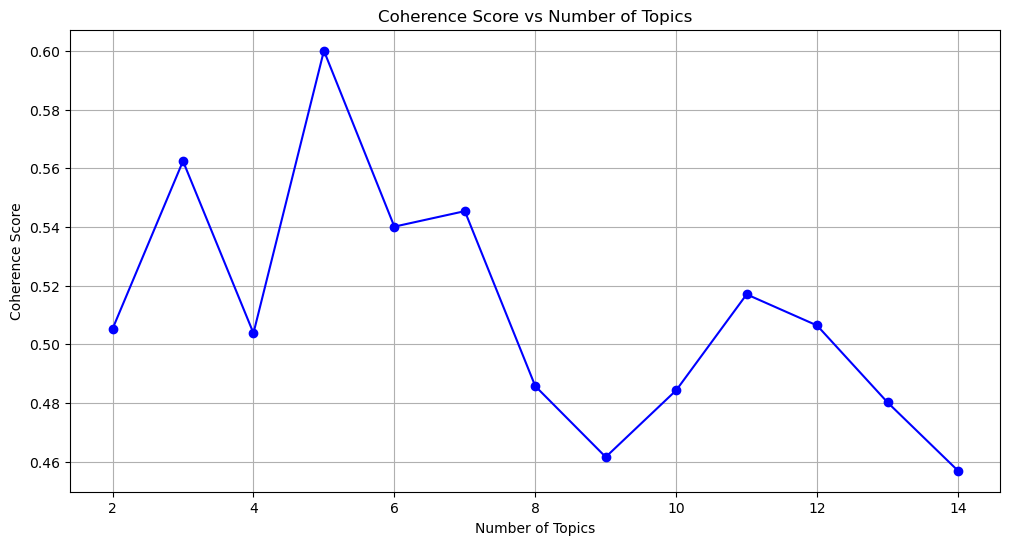


Jumlah topik optimal: 5
Coherence score tertinggi: 0.6000


In [ ]:
print("\n=== Finding Optimal Number of Topics ===")

texts = data['processed_text'].tolist()
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

def calculate_coherence_score(corpus, dictionary, texts, num_topics):
    lda = LatentDirichletAllocation(
        n_components=num_topics,
        random_state=42,
        max_iter=100,
        learning_method='online',
        batch_size=128
    )
    lda.fit(tfidf_matrix)
    
    topics = []
    feature_names = tfidf_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(lda.components_):
        top_words_idx = topic.argsort()[-10:][::-1]
        top_words = [feature_names[i] for i in top_words_idx]
        topics.append(top_words)
    
    coherence_model = CoherenceModel(
        topics=topics,
        texts=texts,
        dictionary=dictionary,
        coherence='c_v'
    )
    return coherence_model.get_coherence()

topic_range = range(2, 15)
coherence_scores = []

print("Menghitung coherence score untuk berbagai jumlah topik...")
for num_topics in topic_range:
    score = calculate_coherence_score(corpus, dictionary, texts, num_topics)
    coherence_scores.append(score)
    print(f"Topics: {num_topics}, Coherence Score: {score:.4f}")

# Visualisasi coherence score
plt.figure(figsize=(12, 6))
plt.plot(topic_range, coherence_scores, 'bo-')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Coherence Score vs Number of Topics')
plt.grid(True)
plt.show()

# Tentukan jumlah topik optimal
optimal_topics = topic_range[np.argmax(coherence_scores)]
print(f"\nJumlah topik optimal: {optimal_topics}")
print(f"Coherence score tertinggi: {max(coherence_scores):.4f}")

In [ ]:
print(f"\n=== Training LDA with {optimal_topics} Topics ===")

# Inisialisasi dan training final LDA model
final_lda = LatentDirichletAllocation(
    n_components=optimal_topics,
    random_state=42,
    max_iter=200,
    learning_method='online',
    batch_size=128,
    evaluate_every=5,
    verbose=1
)

# Fit model
final_lda.fit(tfidf_matrix)

def print_topics(model, feature_names, n_top_words=10):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        top_words_idx = topic.argsort()[-n_top_words:][::-1]
        top_words = [feature_names[i] for i in top_words_idx]
        topics.append(top_words)
        print(f"Topic {topic_idx + 1}: {' | '.join(top_words)}")
    return topics

# Tampilkan topik-topik yang ditemukan
print(f"\nTop {optimal_topics} Topics:")
feature_names = tfidf_vectorizer.get_feature_names_out()
topics = print_topics(final_lda, feature_names)


=== Training LDA with 5 Topics ===
Training LDA model...
iteration: 1 of max_iter: 200
iteration: 2 of max_iter: 200
iteration: 3 of max_iter: 200
iteration: 4 of max_iter: 200
iteration: 5 of max_iter: 200, perplexity: 1056.3113
iteration: 6 of max_iter: 200
iteration: 7 of max_iter: 200
iteration: 8 of max_iter: 200
iteration: 9 of max_iter: 200
iteration: 10 of max_iter: 200, perplexity: 1043.7799
iteration: 11 of max_iter: 200
iteration: 12 of max_iter: 200
iteration: 13 of max_iter: 200
iteration: 14 of max_iter: 200
iteration: 15 of max_iter: 200, perplexity: 1038.8288
iteration: 16 of max_iter: 200
iteration: 17 of max_iter: 200
iteration: 18 of max_iter: 200
iteration: 19 of max_iter: 200
iteration: 20 of max_iter: 200, perplexity: 1037.2386
iteration: 21 of max_iter: 200
iteration: 22 of max_iter: 200
iteration: 23 of max_iter: 200
iteration: 24 of max_iter: 200
iteration: 25 of max_iter: 200, perplexity: 1035.5336
iteration: 26 of max_iter: 200
iteration: 27 of max_iter: 200

In [63]:
import joblib

joblib.dump(final_lda, 'model_lda_final.joblib')
joblib.dump(tfidf_vectorizer, 'vectorizer_tfidf.joblib')

['vectorizer_tfidf.joblib']


=== Soft Clustering Results ===
Shape topic distributions: (8466, 5)
Sample topic distributions (first 5 documents):
Document 1: [0.68897129 0.10208382 0.0556181  0.05406723 0.09925956]
  Dominant topic: 1 (probability: 0.6890)
Document 2: [0.29599773 0.03753664 0.28197345 0.34781307 0.03667911]
  Dominant topic: 4 (probability: 0.3478)
Document 3: [0.06319026 0.18829293 0.10899845 0.49206158 0.14745677]
  Dominant topic: 4 (probability: 0.4921)
Document 4: [0.04005194 0.16596401 0.03973872 0.26785387 0.48639147]
  Dominant topic: 5 (probability: 0.4864)
Document 5: [0.50206095 0.22274608 0.18377211 0.04455283 0.04686804]
  Dominant topic: 1 (probability: 0.5021)

Distribusi dokumen per topik:
Topic 1: 1182 documents (14.0%)
Topic 2: 1112 documents (13.1%)
Topic 3: 2725 documents (32.2%)
Topic 4: 2172 documents (25.7%)
Topic 5: 1275 documents (15.1%)


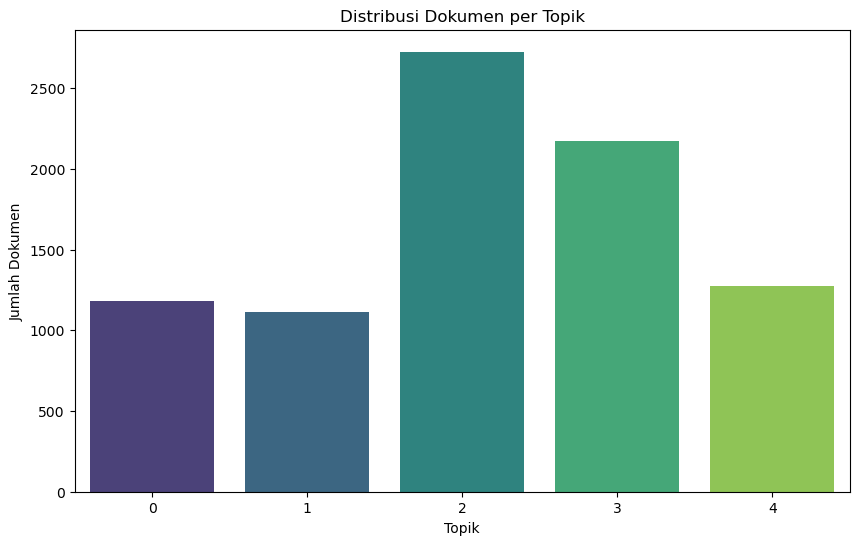

In [58]:
# Soft Clustering dengan LDA
print("\n=== Soft Clustering Results ===")

# Transform data ke topic distributions (soft clustering)
topic_distributions = final_lda.transform(tfidf_matrix)

# Assign dominant topic untuk setiap dokumen
dominant_topics = np.argmax(topic_distributions, axis=1)

# Tambahkan hasil clustering ke dataframe
data['dominant_topic'] = dominant_topics
data['topic_probability'] = np.max(topic_distributions, axis=1)

# Tambahkan semua topic probabilities
for i in range(optimal_topics):
    data[f'topic_{i+1}_prob'] = topic_distributions[:, i]

print(f"Shape topic distributions: {topic_distributions.shape}")
print(f"Sample topic distributions (first 5 documents):")
for i in range(5):
    print(f"Document {i+1}: {topic_distributions[i]}")
    print(f"  Dominant topic: {dominant_topics[i]+1} (probability: {np.max(topic_distributions[i]):.4f})")

print(f"\nDistribusi dokumen per topik:")
topic_counts = pd.Series(dominant_topics).value_counts().sort_index()
for topic_idx, count in topic_counts.items():
    percentage = (count / len(data)) * 100
    print(f"Topic {topic_idx+1}: {count} documents ({percentage:.1f}%)")

# Visualisasi distribusi topik
plt.figure(figsize=(10, 6))
sns.countplot(x=dominant_topics, palette='viridis')
plt.title('Distribusi Dokumen per Topik')
plt.xlabel('Topik')
plt.ylabel('Jumlah Dokumen')
plt.show()

In [ ]:
print("\n=== Analisis Topik ===")

topic_interpretations = {
    0: "Aplikasi Trading & User Experience",
    1: "Transaksi & Keuangan (Withdrawal/Deposit)",
    2: "Pembelajaran Investasi & Kemudahan Penggunaan",
    3: "Technical Issues & Market Hours",
    4: "Registrasi & Setup Akun"
}

# Tampilkan contoh dokumen untuk setiap topik
print("Contoh dokumen untuk setiap topik:")
for topic_idx in range(optimal_topics):
    print(f"\n=== Topic {topic_idx+1}: {topic_interpretations[topic_idx]} ===")
    print(f"Top words: {' | '.join(topics[topic_idx])}")
    
    # Ambil dokumen dengan probabilitas tertinggi untuk topik ini
    topic_docs = data[data['dominant_topic'] == topic_idx].nlargest(3, 'topic_probability')
    
    print("Contoh dokumen:")
    for idx, row in topic_docs.iterrows():
        print(f"  - {row['text_string'][:100]}... (prob: {row['topic_probability']:.4f})")

# Simpan hasil clustering
output_data = data[['content', 'dominant_topic', 'topic_probability'] + 
                   [f'topic_{i+1}_prob' for i in range(optimal_topics)]]

print(f"\n=== Summary ===")
print(f"Total dokumen yang diproses: {len(data)}")
print(f"Jumlah topik optimal: {optimal_topics}")
print(f"Coherence score: {max(coherence_scores):.4f}")
print(f"Rata-rata probabilitas topik dominan: {data['topic_probability'].mean():.4f}")
print(f"Dokumen dengan probabilitas > 0.7: {(data['topic_probability'] > 0.7).sum()} ({(data['topic_probability'] > 0.7).mean()*100:.1f}%)")



=== Analisis Topik ===
Contoh dokumen untuk setiap topik:

=== Topic 1: Aplikasi Trading & User Experience ===
Top words: god | user | aplikasi | aps | stockbit | friendly | bagus | suka | bermanfat | trading
Contoh dokumen:
  - user interface bagus suka lot jaring bagus... (prob: 0.8045)
  - far stockbit the best aplication traders investors god luck... (prob: 0.7869)
  - stockbit tolong bikin sekuritas saham minat tols guna banget... (prob: 0.7850)

=== Topic 2: Transaksi & Keuangan (Withdrawal/Deposit) ===
Top words: banget | cepat | masuk | withdrawal | uang | baik | deposit | withdraw | tolong | dana
Contoh dokumen:
  - jam saldo masuk udah selesai turun banget udah masuk kecewa sih udah customer service sabar hasil... (prob: 0.8151)
  - withdraw sulit jual kecewa banget customer service nomor respon... (prob: 0.8022)
  - deposit masuk saldo chat balas kecewa uang hilang... (prob: 0.7971)

=== Topic 3: Pembelajaran Investasi & Kemudahan Penggunaan ===
Top words: mudah | aplikasi 

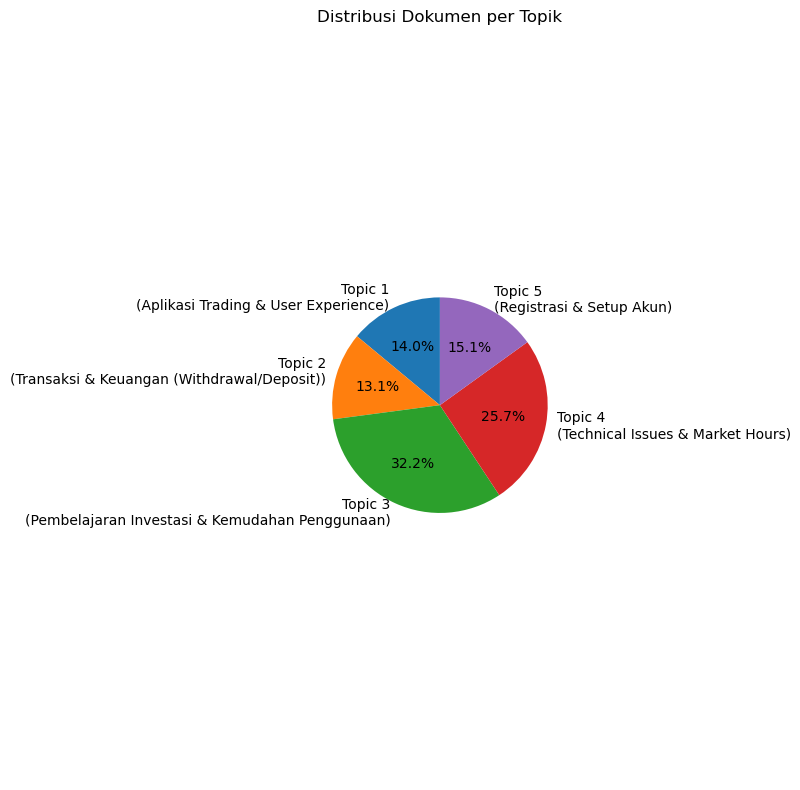

In [61]:
plt.figure(figsize=(8, 8))
topic_counts = data['dominant_topic'].value_counts().sort_index()
topic_labels = [f'Topic {i+1}\n({topic_interpretations[i]})' for i in range(optimal_topics)]
plt.pie(topic_counts, labels=topic_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Dokumen per Topik')
plt.axis('equal')
plt.tight_layout()
plt.show()